# Import Libraries

In [1]:
# NOT-USED LIBRARIES
# import seaborn as sns
# from math import sqrt



# NUMPY LIBRARIES
import numpy as np
from numpy import concatenate



# PANDAS LIBRARIES
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime



# MATPLOTLIB LIBRARIES
import matplotlib.pyplot as plt
from matplotlib import pyplot



# SKLEARN LIBRARIES
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



# KERAS LIBRARIES
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

/home/xsif/anaconda3/envs/env005_energypredappliances/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the dataset

In [2]:
#import the dataset in dataframe
data = pd.read_csv("../datasets/01_KAG_energydata_complete/KAG_energydata_complete.csv")

In [3]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
print ("Number of columns:", len(data.columns))

Number of columns: 29


In [5]:
print ("Number of rows:", len(data))

Number of rows: 19735


# Initializing variables

In [6]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## Based on analysis, we remove other columns and only keep the columns listed in 'features' variable

In [7]:
col_time=["date"]

feature=[
    "RH_out",
    "RH_8",
    "RH_1",
    "T3",
    "RH_3",
    "T2",
    "Press_mm_hg",
    "RH_2",
    "RH_7",
    "T8",
    "RH_6",
    "RH_4",
    "RH_5",
    "T_out",
    "RH_9",
    "T4",
    "T7",
    "Tdewpoint",
    "Windspeed",
    "T1",
    "T5"
]

col_target = ["Appliances"]

# Predefined Functions

In [8]:
# tmp_num_vars = 1 if type(scaled) is list else scaled.shape[1]
# tmp_dataframe = DataFrame(scaled)
# tmp_cols, tmp_names = list(), list()
# for tmp_i in range(1, 0, -1):
#     tmp_cols.append(tmp_dataframe.shift(tmp_i))
#     tmp_names += [('var%d(t-%d)' % (tmp_j+1, tmp_i)) for tmp_j in range(tmp_num_vars)]
# print (tmp_names)
# print ("\n\n\n\n\n\n\n")
# # print (tmp_cols)

# for tmp_i in range(0, 1):
#     tmp_cols.append(tmp_dataframe.shift(-tmp_i))
#     if tmp_i == 0:
#         tmp_names += [('var%d(t)' % (tmp_j+1)) for tmp_j in range(tmp_num_vars)]
#     else:
#         tmp_names += [('var%d(t+%d)' % (tmp_j+1, tmp_i)) for tmp_j in range(tmp_num_vars)]
# print (tmp_names)
# # print ("\n\n\n\n\n\n\n")

In [9]:
# del tmp_num_vars, tmp_dataframe, tmp_cols, tmp_names, tmp_i, tmp_j

In [10]:
# convert series to supervised learning
def series_to_supervised(dataset, n_in=1, n_out=1, dropnan=True):
    num_vars = 1 if type(dataset) is list else dataset.shape[1]
    dataframe = DataFrame(dataset)
    cols, names = list(), list()
    
    # print ("\n\n\n\n\n\n\n******start******\ndataframe:\n")
    # print (dataframe)
    
    # input sequence (t-n, ....t-1)
    for i in range(n_in, 0, -1):
        cols.append(dataframe.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(num_vars)]
    # forecast sequence (t, t+1 .... t+n)
    # print ("******end******\n\n\n\n\n\n\n******start******\ncols[0] / (t) (after loop # 1):\n")
    # print (cols[0])
    
    for i in range(0, n_out):
        cols.append(dataframe.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(num_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(num_vars)]
    
    # print ("******end******\n\n\n\n\n\n\n******start******\ncols[1] (t-1) (after loop # 2):\n")
    # print (cols[1])
    
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names

    # print ("******end******\n\n\n\n\n\n\n******start******\nagg (i.e., aggregation of col[0] (t-1):\n")
    # print (agg["var1(t-1)"])
    # print ("(i.e., aggregation of col[1] (t)):\n")
    # print (agg["var1(t)"])
    
    # print ("******end******\n\n\n\n\n\n\n******start******\ncolumn names of agg:\n")
    # print (names)
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    # print ("******end******\n\n\n\n\n\n\n******start******\nagg (i.e., aggregation of col[0] and col[1]):\n")
    # print (agg)
    
    return agg

In [11]:
# scaled[0]

In [12]:
# values[0]

In [13]:
# tmp_reframed = series_to_supervised(scaled, 1, 1)

In [14]:
# del tmp_reframed

# Setting up train/test dataset

## cloning dataset into 'data1'

In [15]:
data1 = data[col_target + col_time + feature]

In [16]:
data1.head()

,Appliances,date,RH_out,RH_8,RH_1,T3,RH_3,T2,Press_mm_hg,RH_2,...,RH_4,RH_5,T_out,RH_9,T4,T7,Tdewpoint,Windspeed,T1,T5
0,60,2016-01-11 17:00:00,92.0,48.900000,47.596667,19.79,44.730000,19.2,733.5,44.790000,...,45.566667,55.20,6.600000,45.53,19.000000,17.200000,5.3,7.000000,19.89,17.166667
1,60,2016-01-11 17:10:00,92.0,48.863333,46.693333,19.79,44.790000,19.2,733.6,44.722500,...,45.992500,55.20,6.483333,45.56,19.000000,17.200000,5.2,6.666667,19.89,17.166667
2,50,2016-01-11 17:20:00,92.0,48.730000,46.300000,19.79,44.933333,19.2,733.7,44.626667,...,45.890000,55.09,6.366667,45.50,18.926667,17.200000,5.1,6.333333,19.89,17.166667
3,50,2016-01-11 17:30:00,92.0,48.590000,46.066667,19.79,45.000000,19.2,733.8,44.590000,...,45.723333,55.09,6.250000,45.40,18.890000,17.133333,5.0,6.000000,19.89,17.166667
4,60,2016-01-11 17:40:00,92.0,48.590000,46.333333,19.79,45.000000,19.2,733.9,44.530000,...,45.530000,55.09,6.133333,45.40,18.890000,17.200000,4.9,5.666667,19.89,17.200000


## indexing the dataset over the column 'date'

In [17]:
data1["date"]=pd.to_datetime(data1["date"])
data1 = data1.set_index(['date'], drop=True)

/tmp/ipykernel_3988089/3224050610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["date"]=pd.to_datetime(data1["date"])


In [18]:
data1

,Appliances,RH_out,RH_8,RH_1,T3,RH_3,T2,Press_mm_hg,RH_2,RH_7,...,RH_4,RH_5,T_out,RH_9,T4,T7,Tdewpoint,Windspeed,T1,T5
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,92.000000,48.900000,47.596667,19.790000,44.730000,19.200000,733.5,44.790000,41.626667,...,45.566667,55.200000,6.600000,45.5300,19.000000,17.200000,5.300000,7.000000,19.890000,17.166667
2016-01-11 17:10:00,60,92.000000,48.863333,46.693333,19.790000,44.790000,19.200000,733.6,44.722500,41.560000,...,45.992500,55.200000,6.483333,45.5600,19.000000,17.200000,5.200000,6.666667,19.890000,17.166667
2016-01-11 17:20:00,50,92.000000,48.730000,46.300000,19.790000,44.933333,19.200000,733.7,44.626667,41.433333,...,45.890000,55.090000,6.366667,45.5000,18.926667,17.200000,5.100000,6.333333,19.890000,17.166667
2016-01-11 17:30:00,50,92.000000,48.590000,46.066667,19.790000,45.000000,19.200000,733.8,44.590000,41.290000,...,45.723333,55.090000,6.250000,45.4000,18.890000,17.133333,5.000000,6.000000,19.890000,17.166667
2016-01-11 17:40:00,60,92.000000,48.590000,46.333333,19.790000,45.000000,19.200000,733.9,44.530000,41.230000,...,45.530000,55.090000,6.133333,45.4000,18.890000,17.200000,4.900000,5.666667,19.890000,17.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,55.666667,50.074000,46.560000,27.200000,41.163333,25.890000,755.2,42.025714,44.500000,...,45.590000,52.400000,22.733333,46.7900,24.700000,24.500000,13.333333,3.333333,25.566667,23.200000
2016-05-27 17:30:00,90,56.000000,49.790000,46.500000,27.133333,41.223333,25.754000,755.2,42.080000,44.414286,...,45.590000,52.326667,22.600000,46.7900,24.700000,24.557143,13.300000,3.500000,25.500000,23.230000
2016-05-27 17:40:00,270,56.333333,49.660000,46.596667,27.050000,41.690000,25.628571,755.2,42.768571,44.400000,...,45.730000,52.266667,22.466667,46.7900,24.700000,24.540000,13.266667,3.666667,25.500000,23.230000


### now, we can access the dataset rows using date as an 'index' in addition to '0-n'

In [19]:
data1.columns

Index(['Appliances', 'RH_out', 'RH_8', 'RH_1', 'T3', 'RH_3', 'T2',
       'Press_mm_hg', 'RH_2', 'RH_7', 'T8', 'RH_6', 'RH_4', 'RH_5', 'T_out',
       'RH_9', 'T4', 'T7', 'Tdewpoint', 'Windspeed', 'T1', 'T5'],
      dtype='object')

In [20]:
len(data1.columns)

22

In [21]:
data1["Appliances"]["2016-01-11 17:00:00"]

60

## converting/getting dataframe values into an 'numpy array'

In [22]:
print ("Number of columns:", len(data1.columns))

Number of columns: 22


In [23]:
print ("Number of rows:", len(data1))

Number of rows: 19735


In [24]:
values=data1.values

In [25]:
values.shape

(19735, 22)

In [26]:
values[19734][21] #last row and last colum's value

23.2

## scaling the dataset because LSTM can only interpret scalar values (not string/complex datatypes)

In [27]:
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [28]:
scaled.shape

(19735, 22)

In [29]:
type(scaled)

numpy.ndarray

## getting the scaled values back into a 'dataframe' against the time 't-1' and 't'

In [30]:
reframed = series_to_supervised(scaled, 1, 1)

In [31]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t),var21(t),var22(t)
1,0.046729,0.894737,0.661412,0.566187,0.215188,0.746066,0.225345,0.097674,0.684038,0.653428,...,0.782437,0.381691,0.369239,0.678532,0.351351,0.170594,0.533937,0.476190,0.327350,0.175506
2,0.046729,0.894737,0.660155,0.541326,0.215188,0.748871,0.225345,0.100000,0.682140,0.651064,...,0.778062,0.380037,0.365488,0.676049,0.344745,0.170594,0.529412,0.452381,0.327350,0.175506
3,0.037383,0.894737,0.655586,0.530502,0.215188,0.755569,0.225345,0.102326,0.679445,0.646572,...,0.770949,0.380037,0.361736,0.671909,0.341441,0.164310,0.524887,0.428571,0.327350,0.175506
4,0.037383,0.894737,0.650788,0.524080,0.215188,0.758685,0.225345,0.104651,0.678414,0.641489,...,0.762697,0.380037,0.357985,0.671909,0.341441,0.170594,0.520362,0.404762,0.327350,0.178691
5,0.046729,0.894737,0.650788,0.531419,0.215188,0.758685,0.225345,0.106977,0.676727,0.639362,...,0.771233,0.379135,0.354234,0.667357,0.341441,0.164310,0.515837,0.380952,0.327350,0.172320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.074766,0.412281,0.714359,0.545913,0.841088,0.575946,0.718052,0.602326,0.620602,0.764691,...,0.765258,0.339590,0.891747,0.729443,0.864865,0.858624,0.901961,0.238095,0.926786,0.752031
19731,0.084112,0.416667,0.701645,0.537657,0.830841,0.579374,0.711655,0.602326,0.606309,0.755319,...,0.765258,0.338487,0.887460,0.729443,0.864865,0.864010,0.900452,0.250000,0.919747,0.754897
19732,0.074766,0.421053,0.691912,0.536006,0.825302,0.582178,0.701769,0.602326,0.607836,0.752280,...,0.771233,0.337585,0.883173,0.729443,0.864865,0.862394,0.898944,0.261905,0.919747,0.754897
19733,0.242991,0.425439,0.687457,0.538666,0.818378,0.603988,0.692651,0.602326,0.627198,0.751773,...,0.773794,0.336583,0.878885,0.730581,0.864865,0.858624,0.897436,0.273810,0.919747,0.752031


### displaying 't-1' and 't' timestamped data

In [32]:
# This copy two columns is a deep copy so any change in this copy does not affect the original dataframe
reframed_var_t_1_and_t = reframed[["var1(t-1)", "var1(t)"]].copy(deep=True)

In [33]:
reframed_var_t_1_and_t

,var1(t-1),var1(t)
1,0.046729,0.046729
2,0.046729,0.037383
3,0.037383,0.037383
4,0.037383,0.046729
5,0.046729,0.037383
...,...,...
19730,0.074766,0.084112
19731,0.084112,0.074766
19732,0.074766,0.242991
19733,0.242991,0.383178


In [34]:
del reframed_var_t_1_and_t

## 'reframed' dataframe returned contains 44 columns, so we need to remove the remaining 22 extra columns

In [35]:
reframed.drop(reframed.columns[[22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]], axis=1, inplace=True)

In [36]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1)
1,0.046729,0.894737,0.661412,0.566187,0.215188,0.746066,0.225345,0.097674,0.684038,0.653428,...,0.764262,0.381691,0.372990,0.677290,0.351351,0.170594,0.538462,0.500000,0.327350,0.175506
2,0.046729,0.894737,0.660155,0.541326,0.215188,0.748871,0.225345,0.100000,0.682140,0.651064,...,0.782437,0.381691,0.369239,0.678532,0.351351,0.170594,0.533937,0.476190,0.327350,0.175506
3,0.037383,0.894737,0.655586,0.530502,0.215188,0.755569,0.225345,0.102326,0.679445,0.646572,...,0.778062,0.380037,0.365488,0.676049,0.344745,0.170594,0.529412,0.452381,0.327350,0.175506
4,0.037383,0.894737,0.650788,0.524080,0.215188,0.758685,0.225345,0.104651,0.678414,0.641489,...,0.770949,0.380037,0.361736,0.671909,0.341441,0.164310,0.524887,0.428571,0.327350,0.175506
5,0.046729,0.894737,0.650788,0.531419,0.215188,0.758685,0.225345,0.106977,0.676727,0.639362,...,0.762697,0.380037,0.357985,0.671909,0.341441,0.170594,0.520362,0.404762,0.327350,0.178691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.074766,0.412281,0.714359,0.545913,0.841088,0.575946,0.718052,0.602326,0.620602,0.764691,...,0.766823,0.338487,0.896034,0.727580,0.864865,0.858624,0.903469,0.226190,0.923266,0.752031
19731,0.084112,0.416667,0.701645,0.537657,0.830841,0.579374,0.711655,0.602326,0.606309,0.755319,...,0.765258,0.339590,0.891747,0.729443,0.864865,0.858624,0.901961,0.238095,0.926786,0.752031
19732,0.074766,0.421053,0.691912,0.536006,0.825302,0.582178,0.701769,0.602326,0.607836,0.752280,...,0.765258,0.338487,0.887460,0.729443,0.864865,0.864010,0.900452,0.250000,0.919747,0.754897
19733,0.242991,0.425439,0.687457,0.538666,0.818378,0.603988,0.692651,0.602326,0.627198,0.751773,...,0.771233,0.337585,0.883173,0.729443,0.864865,0.862394,0.898944,0.261905,0.919747,0.754897


## overwriting 'values' variable (previously it contained real values, now it has values in the range of 0-1)

In [37]:
values = reframed.values

In [38]:
values[0]

array([0.04672897, 0.89473684, 0.66141193, 0.56618659, 0.21518777,
       0.74606637, 0.22534529, 0.09767442, 0.68403787, 0.6534279 ,
       0.17332926, 0.84182676, 0.76426234, 0.38169106, 0.37299035,
       0.67729029, 0.35135135, 0.17059378, 0.53846154, 0.5       ,
       0.32734952, 0.17550565])

In [39]:
print(
    "Shape of 'values': {:}\n\t- Rows in 'values': {:}\n\t- Columns in 'values': {:}".format(
        values.shape, values.shape[1], values.shape[0]
    )
)

Shape of 'values': (19734, 22)
	- Rows in 'values': 22
	- Columns in 'values': 19734


## 'X' contains all inputs whereas 'Y' contains all outputs

In [40]:
# before X and Y
# X = values[:,:21]
# Y = values[:,21]

# mine X and Y
X = values[:,1:22]
Y = values[:,0]

In [41]:
X.shape

(19734, 21)

In [42]:
Y.shape

(19734,)

In [43]:
input_row_number = 0
print ("training data[{:}]:\n  {:}".format(input_row_number, values[input_row_number]))
print ("\ntraining input[{:}]:\n  {:}".format(input_row_number, X[input_row_number]))
print ("\ntraining output[{:}]: {:}".format(input_row_number, Y[input_row_number]))

training data[0]:
  [0.04672897 0.89473684 0.66141193 0.56618659 0.21518777 0.74606637
 0.22534529 0.09767442 0.68403787 0.6534279  0.17332926 0.84182676
 0.76426234 0.38169106 0.37299035 0.67729029 0.35135135 0.17059378
 0.53846154 0.5        0.32734952 0.17550565]

training input[0]:
  [0.89473684 0.66141193 0.56618659 0.21518777 0.74606637 0.22534529
 0.09767442 0.68403787 0.6534279  0.17332926 0.84182676 0.76426234
 0.38169106 0.37299035 0.67729029 0.35135135 0.17059378 0.53846154
 0.5        0.32734952 0.17550565]

training output[0]: 0.04672897196261682


## Splitting up training/test data

In [44]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

# reshape input to be 3D [samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

In [45]:
X_Train.shape

(13813, 1, 21)

In [46]:
X_Train.shape[2]

21

In [47]:
Y_Train.shape

(13813,)

In [48]:
X_Test.shape

(5921, 1, 21)

In [49]:
Y_Test.shape

(5921,)

## LSTM condiguration

In [2]:
# from mealpy.swarm_based import GWO

In [50]:
model = Sequential()
model.add(LSTM(
    50, #units
    input_shape=(# (1, 21)
        X_Train.shape[1],# 1 row
        X_Train.shape[2]# 21 columns
    )
))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit
history = model.fit(
    X_Train,
    Y_Train,
    epochs=70,
    batch_size=10,
    validation_data=(X_Test, Y_Test),
    verbose=2,
    shuffle=False
)

2022-10-28 12:08:52.309695: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 12:08:52.310432: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/70
1382/1382 - 3s - loss: 0.0086 - val_loss: 0.0087 - 3s/epoch - 2ms/step
Epoch 2/70
1382/1382 - 2s - loss: 0.0082 - val_loss: 0.0086 - 2s/epoch - 1ms/step
Epoch 3/70
1382/1382 - 2s - loss: 0.0081 - val_loss: 0.0085 - 2s/epoch - 1ms/step
Epoch 4/70
1382/1382 - 2s - loss: 0.0080 - val_loss: 0.0085 - 2s/epoch - 1ms/step
Epoch 5/70
1382/1382 - 2s - loss: 0.0080 - val_loss: 0.0084 - 2s/epoch - 1ms/step
Epoch 6/70
1382/1382 - 2s - loss: 0.0079 - val_loss: 0.0084 - 2s/epoch - 1ms/step
Epoch 7/70
1382/1382 - 2s - loss: 0.0079 - val_loss: 0.0084 - 2s/epoch - 1ms/step
Epoch 8/70
1382/1382 - 2s - loss: 0.0079 - val_loss: 0.0083 - 2s/epoch - 1ms/step
Epoch 9/70
1382/1382 - 2s - loss: 0.0078 - val_loss: 0.0083 - 2s/epoch - 1ms/step
Epoch 10/70
1382/1382 - 2s - loss: 0.0078 - val_loss: 0.0083 - 2s/epoch - 1ms/step
Epoch 11/70
1382/1382 - 2s - loss: 0.0078 - val_loss: 0.0082 - 2s/epoch - 1ms/step
Epoch 12/70
1382/1382 - 2s - loss: 0.0077 - val_loss: 0.0082 - 2s/epoch - 1ms/step
Epoch 13/70
1

## Plotting training history to show training progress

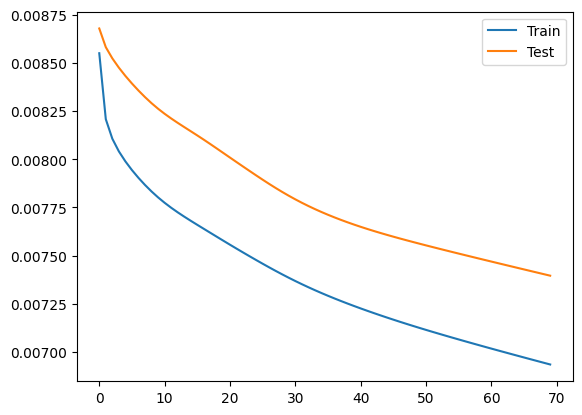

In [51]:
pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.legend()
pyplot.show()

## Converting 'scaled' array into a dataframe (we did not use it but just printed for visualizing the data)

In [52]:
scaled.shape

(19735, 22)

In [53]:
sca=DataFrame(scaled)
sca.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.046729,0.894737,0.661412,0.566187,0.215188,0.746066,0.225345,0.097674,0.684038,0.653428,...,0.764262,0.381691,0.372990,0.677290,0.351351,0.170594,0.538462,0.500000,0.32735,0.175506
1,0.046729,0.894737,0.660155,0.541326,0.215188,0.748871,0.225345,0.100000,0.682140,0.651064,...,0.782437,0.381691,0.369239,0.678532,0.351351,0.170594,0.533937,0.476190,0.32735,0.175506
2,0.037383,0.894737,0.655586,0.530502,0.215188,0.755569,0.225345,0.102326,0.679445,0.646572,...,0.778062,0.380037,0.365488,0.676049,0.344745,0.170594,0.529412,0.452381,0.32735,0.175506
3,0.037383,0.894737,0.650788,0.524080,0.215188,0.758685,0.225345,0.104651,0.678414,0.641489,...,0.770949,0.380037,0.361736,0.671909,0.341441,0.164310,0.524887,0.428571,0.32735,0.175506
4,0.046729,0.894737,0.650788,0.531419,0.215188,0.758685,0.225345,0.106977,0.676727,0.639362,...,0.762697,0.380037,0.357985,0.671909,0.341441,0.170594,0.520362,0.404762,0.32735,0.178691


In [54]:
sca.shape

(19735, 22)

## Evaluating the LSTM model

### - MSE

In [55]:
lstm_test_mse = model.evaluate(X_Test, Y_Test, batch_size=1)
print('Test MSE: %f'%lstm_test_mse)

5921/5921 [==============================] - 11s 2ms/step - loss: 0.0074
Test MSE: 0.007396


### - R2 Score

In [56]:
y_pred_test_lstm = model.predict(X_Test)
y_train_pred_lstm = model.predict(X_Train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_Train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_Test, y_pred_test_lstm)))

432/432 [==============================] - 1s 2ms/step
The R2 score on the Train set is:	0.243
The R2 score on the Test set is:	0.235


## Plotting LSTM forecast, in comparison to the actual

186/186 [==============================] - 0s 1ms/step


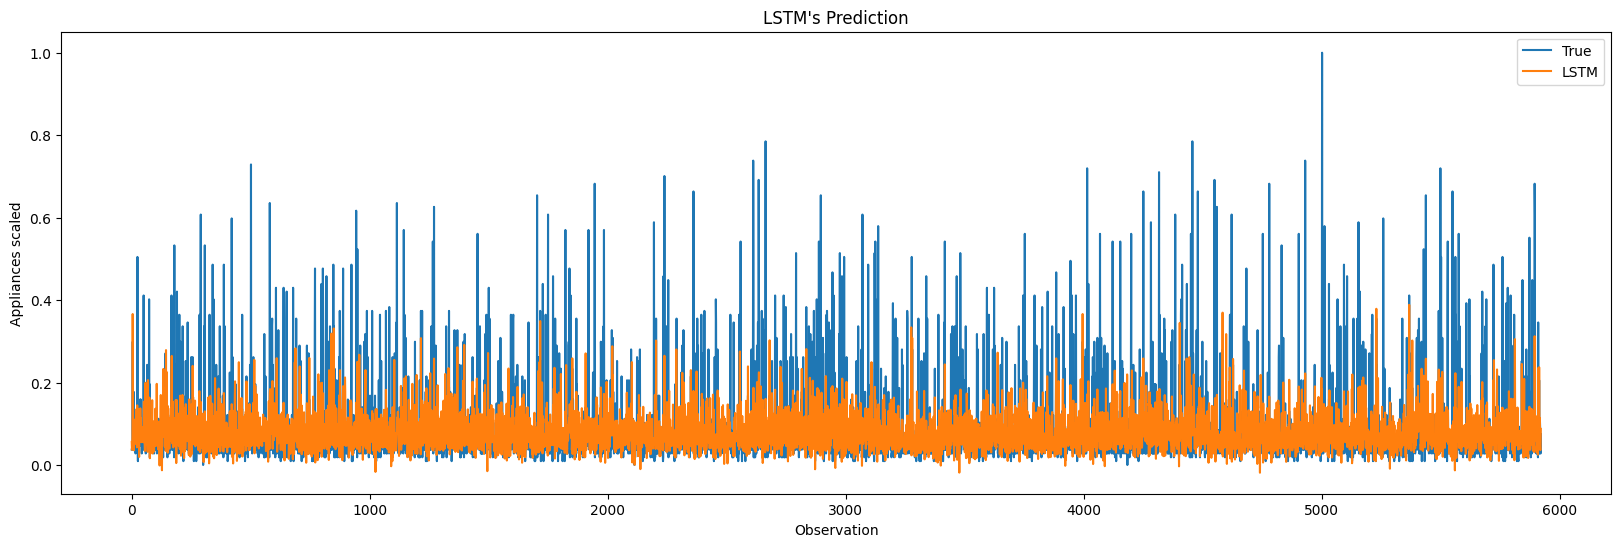

In [57]:
lstm_y_pred_test = model.predict(X_Test)
plt.figure(figsize=(20, 6))
plt.plot(Y_Test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Appliances scaled')
plt.legend()
plt.show();

### - RMSE

In [58]:
# make a prediction
yhat = model.predict(X_Test)
X_Test = X_Test.reshape((X_Test.shape[0], 21))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_Test[:, -21:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
Y_Test = Y_Test.reshape((len(Y_Test), 1))
inv_y = np.concatenate((Y_Test, X_Test[:, -21:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

186/186 [==============================] - 0s 2ms/step
Test RMSE: 92.020


# Testing

In [70]:
# tmp_values = np.array(
#     [np.random.random(3) for element in range(4)]
# )

In [71]:
# tmp_values

In [72]:
# tmp_values[:,:2]

In [73]:
# tmp_values[:,2]

In [74]:
# tmp_values[0][0]

In [75]:
# tmp_values[:,1:3]

In [76]:
# print(
#     "tmp_values.shape {:},\ntmp_values[:,:1].shape {:},\ntmp_values[:,1].shape {:}".format(
#         tmp_values.shape, tmp_values[:,:1].shape, tmp_values[:,1].shape
#     )
# )

In [77]:
# tmp_Y = tmp_values[:,1]

In [78]:
# tmp_Y

In [79]:
# del tmp_values, tmp_Y